# TOPIC OF ANALYSIS : POLLUTION IN USA

In [50]:
## PROBLEM STATEMENT: 
# problem statement : Pollution is a pressing environmental issue in the United States,
# with various industries contributing to the release of harmful pollutants that affect air, water, and land resources.
# Despite progress through regulations like the Clean Air Act and Clean Water Act, climate change is a growing concern.
# Addressing pollution requires a multi-faceted approach, including regulatory measures, technological innovation
# and public education and engagement. Collaborative efforts are needed to mitigate the negative impacts of pollution
# and safeguard the health of the planet and its inhabitants. 

In [ ]:
# The Air Quality Index (AQI) is a measurement tool used to determine the quality of air in a specific location.
# It takes into account a variety of factors, such as ozone, particle pollution and carbon monoxide levels
# to provide a comprehensive assessment of air quality. AQI levels range from 0 to 500 with higher values
# indicating more polluted air.

# The AQI is calculated based on air quality standards set by the Environmental Protection Agency (EPA)
# which uses data from air monitoring stations across the United States. Each pollutant has its own standard
# and the AQI value is determined by the highest pollutant level recorded. AQI values are divided into six categories
# ranging from "good" to "hazardous," with corresponding health messages provided to help people understand the
# potential health risks.

# The AQI can be a valuable tool for individuals, businesses and government agencies to make informed decisions
# about activities that can affect air quality. For example an AQI value in the "unhealthy" range might prompt 
# a school to cancel outdoor activities or a construction company to reschedule work that generates dust or emissions.
# By using the AQI to monitor air quality, individuals and organizations can take steps to protect their health
# and reduce their impact on the environment.

# lets gather that information which is readily available in the some previously done segments of analysis
# for some of the perspectives and use them accordingly in order to reduce the data collection and cleaning time. 

In [7]:
#importing the required libraries
import pandas as pd


#adequate path of the CSV
# this csv file contains the relatable AQI information for the different states in the USA
# the informations definition of the data in the below csv is :
#     CBSA Code - The core-based statistical area (CBSA) code. CBSA = a U.S. geographic area defined by the Office of Management and Budget (OMB) that consists of one or more counties.
#     Date - The day of measurement.
#     AQI - The average air quality index (AQI) value for the day.
#     Category - The category of air quality ranging from "Good" to "Hazardous".
#     Defining Parameter - One of PM2.5 (particulate matter), PM10, Ozone, Carbon Monoxide, Sulfur Dioxide, or Nitrogen Dioxide which has the highest concentration.
#     Number of Sites Reporting - The number of stations used to make the data aggregation.
#     city_ascii - Name of the city where the measurement was taken.
#     state_id - Abbreviation of the state where the measurement was taken.
#     state_name - The state where the measurement was taken.
#     lat - The latitude where the measurement was taken.
#     lng - The longitude where the measurement was taken.
#     population - The population of the region where the measurement was taken.
#     density - The population per square kilometer where the measurement was taken.
#     timezone - The time zone of the region where the measurement was taken.

# source:https://www.kaggle.com/code/calebreigada/us-air-quality-analysis/notebook#Read-In-Dataset

path_csv = "/Users/tadatilalith.varma/Desktop/US_AQI.csv"

aqi_data = pd.read_csv(path_csv, index_col=0)

#printing top 5
aqi_data.head()

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


In [10]:
# Sets segments for different AIR QUALITY levels
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from copy import copy


# categorizing them accordingly for the ease
GOOD = plt.Rectangle((-1_000,0), 17_500, 50, fc='green',ec="green", alpha=0.25)
MODERATE = plt.Rectangle((-1_000,50), 17_500, 50, fc='yellow',ec="yellow", alpha=0.25)
UNHEALTHY_FOR_SENSITIVE_PEOPLE = plt.Rectangle((-1_000,100), 17_500, 50,fc='orange',ec="orange", alpha=0.25)
UNHEALTHY = plt.Rectangle((-1_000,150), 17_500, 50, fc='red',ec="red", alpha=0.25)
VERY_UNHEALTHY = plt.Rectangle((-1_000,200), 17_500, 100, fc='purple',ec="purple", alpha=0.25)
HAZARDOUS = plt.Rectangle((-1_000,300), 17_500, 200, fc='maroon',ec="maroon", alpha=0.25)

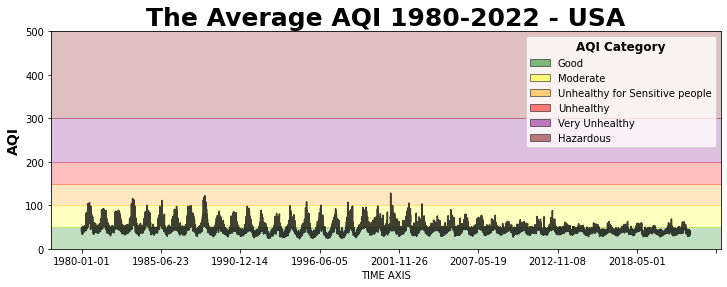

In [12]:
#ploting average AQI along the time axis
aqi_all_usa = aqi_data.groupby('Date').AQI.mean().loc[:'2022-01-01']

aqi_all_usa.plot(figsize=(12,4), color='black', alpha=0.75)
plt.title('The Average AQI 1980-2022 - USA', {'size': 25, 'weight': 'bold'})

# adding the color for patch
plt.gca().add_patch(copy(GOOD))
plt.gca().add_patch(copy(MODERATE))
plt.gca().add_patch(copy(UNHEALTHY_FOR_SENSITIVE_PEOPLE))
plt.gca().add_patch(copy(UNHEALTHY))
plt.gca().add_patch(copy(VERY_UNHEALTHY))
plt.gca().add_patch(copy(HAZARDOUS))

plt.xlabel('TIME AXIS')
plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})
plt.ylim(0, 500)

#Setting up legend
legend_elements = [
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Good'),
    Patch(facecolor='yellow', edgecolor='black', alpha=0.5, label='Moderate'),
    Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Unhealthy for Sensitive people'),
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Unhealthy'),
    Patch(facecolor='purple', edgecolor='black', alpha=0.5, label='Very Unhealthy'),
    Patch(facecolor='maroon', edgecolor='black', alpha=0.5, label='Hazardous'),
                  ]


legend = plt.legend(handles=legend_elements)
legend.set_title("AQI Category", prop = {'size':12, 'weight': 'bold'})

#displays the plot
plt.show()

In [51]:
# According to the above information from the plot of the average AQI it is clear that the levels are very much
# high during the 80's and the concentration was reduced in the graph over the time axis, and there by as a result
# we can see the decrese in the pollution and increase in the quality of the air by the year 2020. But how ever the 
# reasons might be diverse and the distribution might be different cause the average is always a cummulative where their
# might be major contributors who causing the majority of the affect.
# So lets find the individual contribution of the states in the USA to the AQI.

In [15]:
#loading the corresponding data for the pollution in USA
# here is a dataset which have the information on day to day basis and have almost every day data from 1980 to 2021
# and therefore its a huge dataset altogether.
# the definition of the information in the dataset is straight forward.

# source:https://www.kaggle.com/datasets/threnjen/40-years-of-air-quality-index-from-the-epa-daily/discussion?datasetId=1556851

pollution_data_80_21 = pd.read_csv('/Users/tadatilalith.varma/Downloads/aqi_daily_1980_to_2021.csv')
pollution_data_80_21.head(50)

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2021-01-01,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,Alabama,2021-01-02,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,Alabama,2021-01-03,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,Alabama,2021-01-04,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,Alabama,2021-01-05,31,Good,Ozone,34.289001,-85.970065,DeKalb
...,...,...,...,...,...,...,...,...
45,Alabama,2021-02-16,28,Good,Ozone,34.289001,-85.970065,DeKalb
46,Alabama,2021-02-17,25,Good,Ozone,34.289001,-85.970065,DeKalb
47,Alabama,2021-02-18,26,Good,Ozone,34.289001,-85.970065,DeKalb
48,Alabama,2021-02-19,41,Good,Ozone,34.289001,-85.970065,DeKalb


In [25]:
pollution_data_80_21 = pollution_data_80_21[['State Name', 'Date', 'AQI']]

In [26]:
pollution_data_80_21 = pollution_data_80_21.groupby(['State Name', 'Date']).mean().reset_index()

In [34]:
#this function will help us to plot the graph for the given statename
def plot_aqi(state_name):
    data = pollution_data_80_21[pollution_data_80_21['State Name'] == state_name]
    x = data['Date']
    y = data['AQI']
    plt.plot(x, y)
    plt.xlabel('Days - >')
    plt.ylabel('AQI ->')
    plt.title('AQI for ' + state_name)
    plt.show()

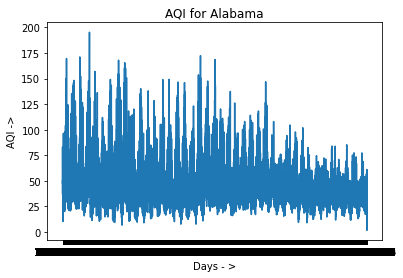

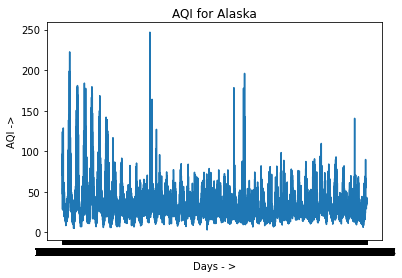

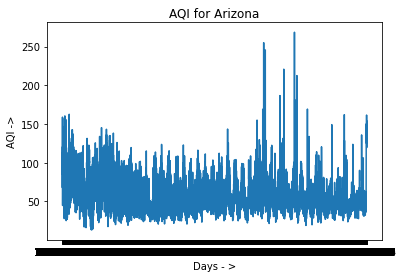

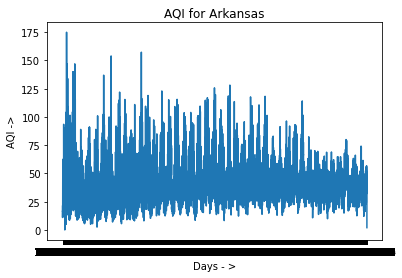

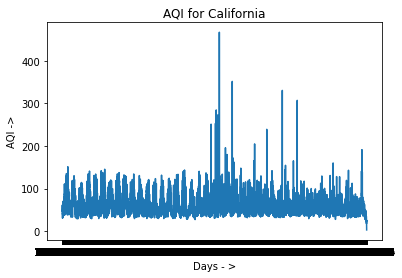

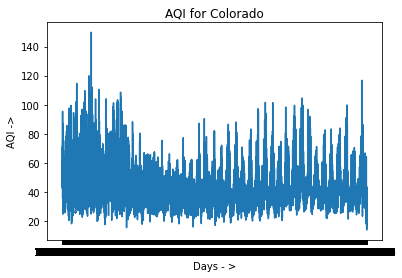

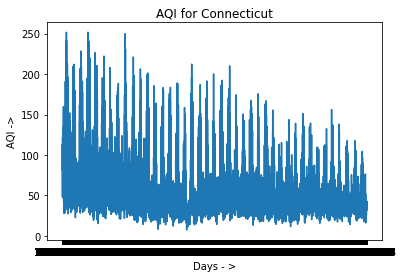

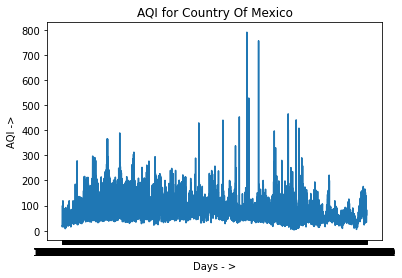

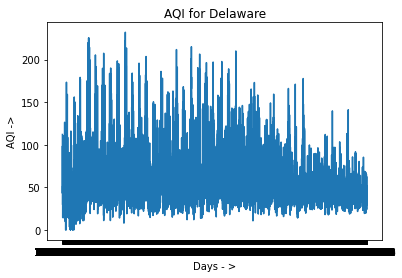

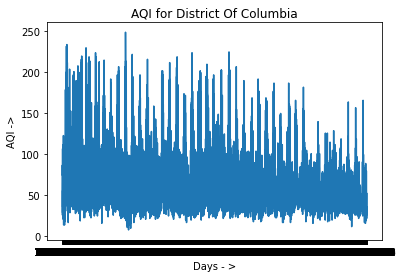

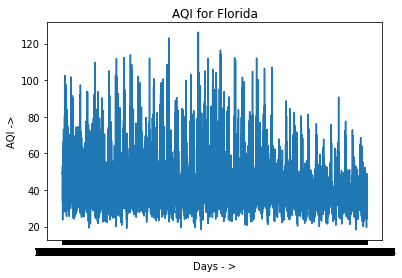

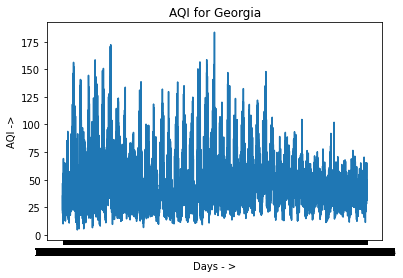

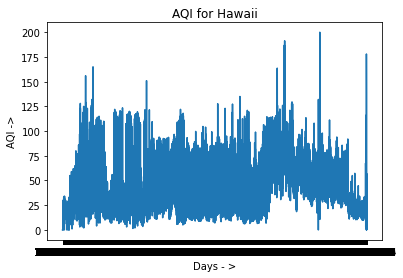

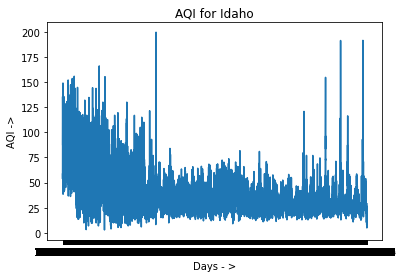

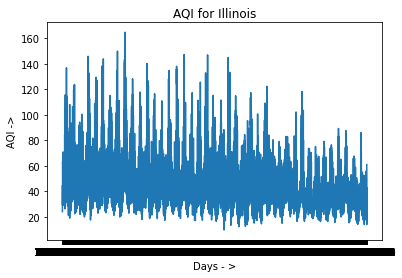

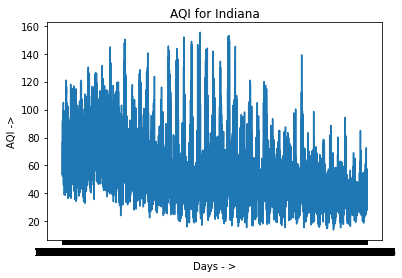

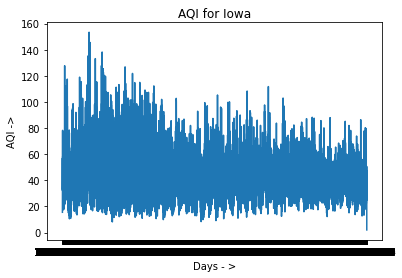

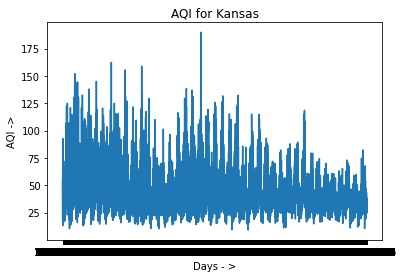

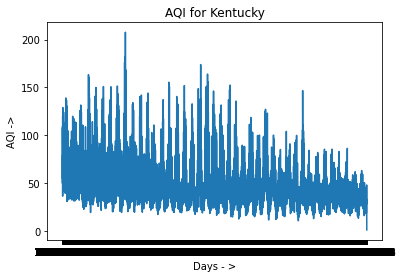

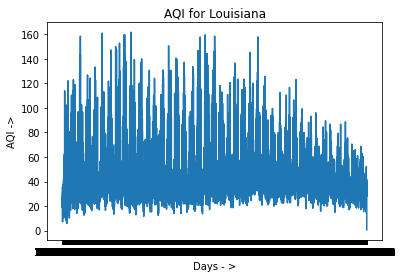

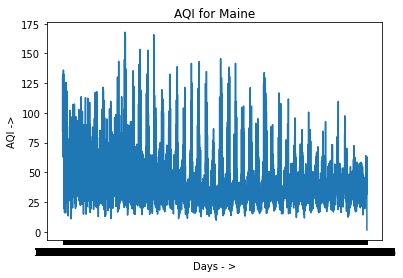

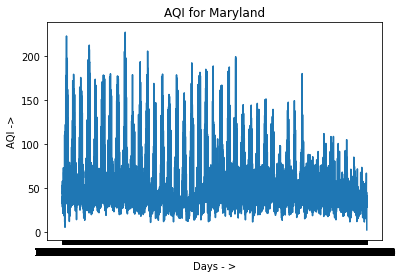

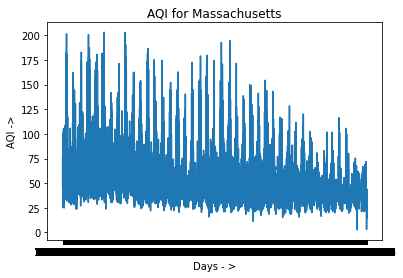

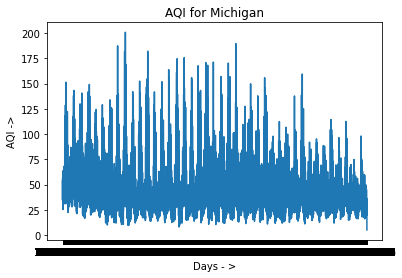

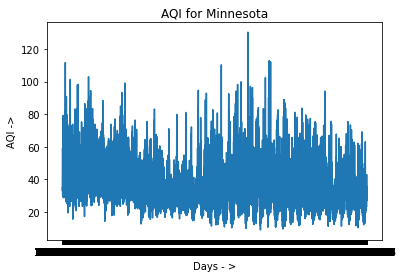

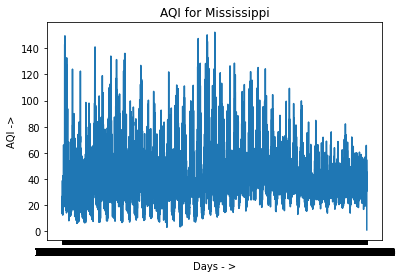

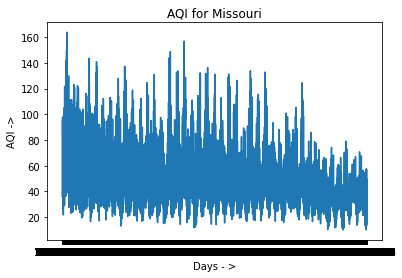

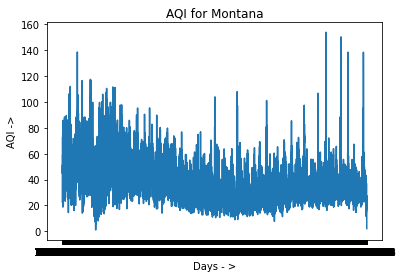

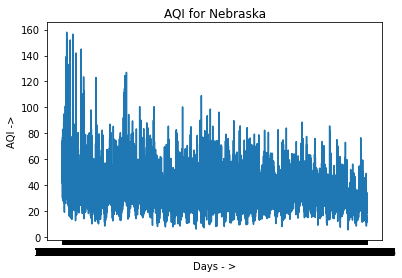

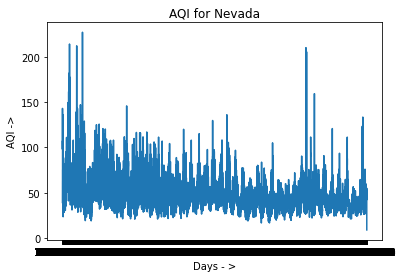

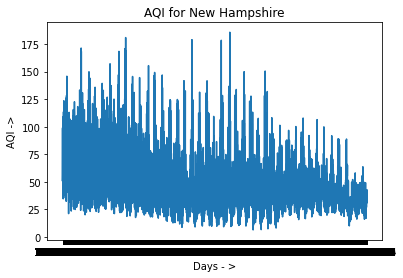

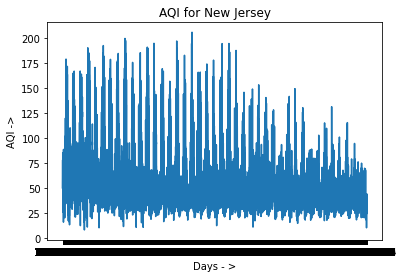

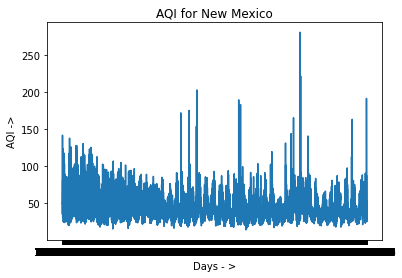

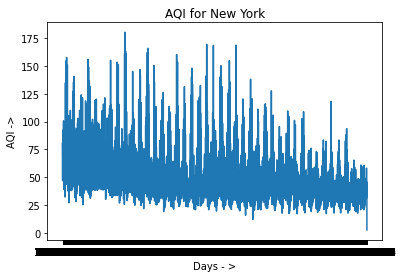

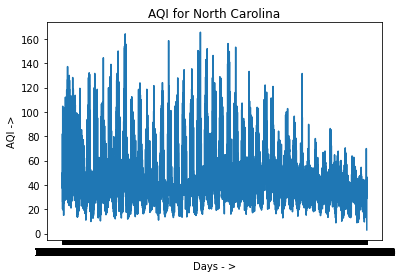

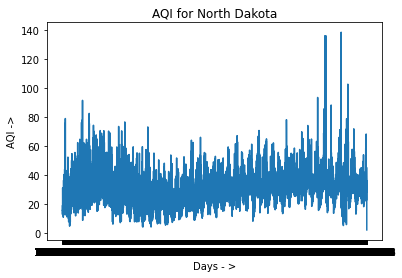

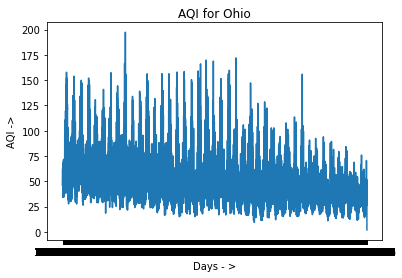

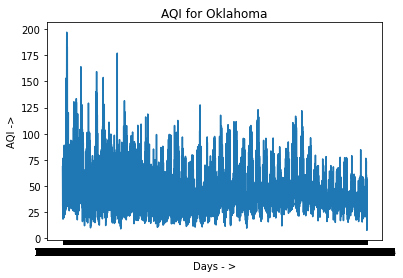

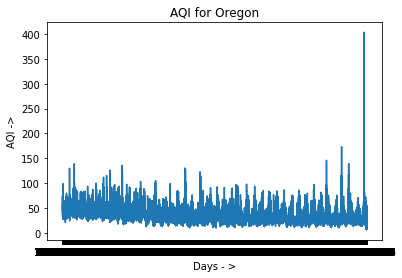

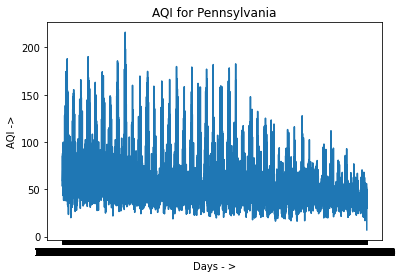

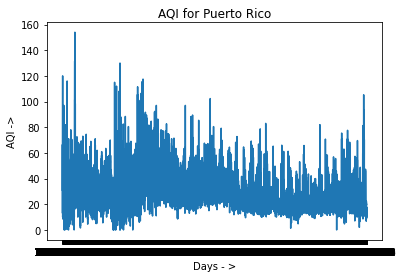

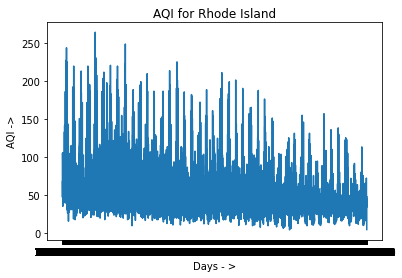

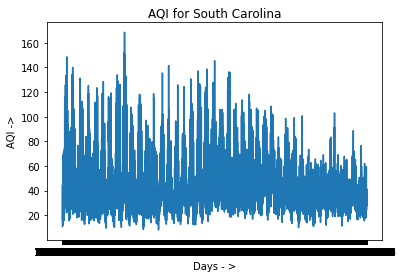

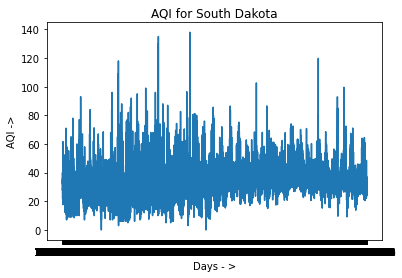

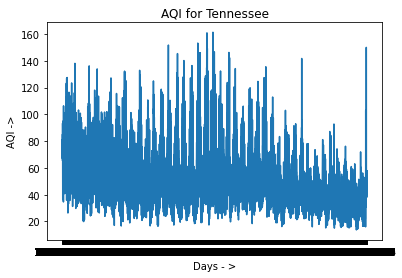

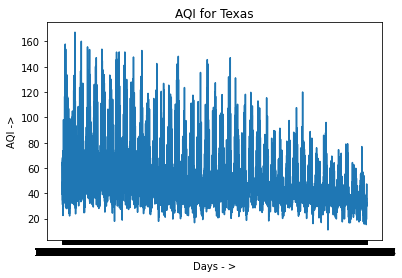

KeyboardInterrupt: 

In [36]:
#the below code will help to print the chart for the all states in USA.
# if you feel that this is taking more time please feel free to add the cities in to the below list and uncomment
# and use it for the time being.
# states_list = ['California','Texas','New York']
states_list = pollution_data_80_21['State Name'].unique().tolist()
for state in states_list:
    plot_aqi(state)

In [ ]:
# Now as seen in the above graphs for the different cities across the United states we see that almost every city have
# decresed their Carbon emission by a good extent over the time but any how ever there are some places 
# like Montana and Idaho etc, where the level was not getting down and was maintained in a constant level almost.
# so lets see the individual perspective or the reasons for the cause of emission and filter them and slicing
# the data as pe the requirement and see weather the sole affects are causing any cummilation affect
# to the nation or is it maintained or brought down .

In [37]:
#importing the required libraries
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from textwrap import wrap
%matplotlib inline

In [47]:

# the data we need for this analysis is available and can be acquired from the renounced datasets which are, 
# 2020 world development indicators.

# source: https://data.world/worldbank/world-development-indicators

# here we pick two of our required data sets and prepare the data for our ease to analyse.

df_WDI_DATA=pd.read_csv('/Users/tadatilalith.varma/Desktop/WDIData_T.csv')
supdata=pd.read_csv('/Users/tadatilalith.varma/Desktop/WDICountry.csv')

# Remove agrregated data.
# filtering the data to the values we only needed for the analysis and that too for the nation USA.

c_exclude='|'.join(supdata[supdata['Currency Unit'].isna()]['Country Code'].unique().tolist())
data = df_WDI_DATA[~df_WDI_DATA['CountryCode'].str.contains(c_exclude)]

# if want to add more countries make a list of country codes and add them to the below filter/
data = data.filter(items=['CountryName', 'CountryCode', 'IndicatorName','IndicatorCode','Year','Value']).loc[data['CountryCode'] == 'USA']

In [52]:
# Setup Masks For Slicing Data
# now we need to pick the indicators which we ment to analyse or which are dealing with the pollutions aspects.
# so below are the indicators we picked from the list of indicators and filtered the respective data using them.

# co2 emission indicator.
co2_indicator = 'CO2 emissions \(metric'
co2kt_indicator = 'CO2 emissions \(kt'

# total green house gas emissions.
totGHG_indicator = 'Total greenhouse gas emissions \(kt of CO2'

# we only looking into the country USA as this is a huge dataset.
# if you want to check for other locations add them to the below string seperating by as pipe 
hist_country = 'USA'

# all the fuels which are causing the emisson are listed in the single string separated by a pipe and used later.
totFuel='CO2 emissions from gaseous fuel consumption|CO2 emissions from liquid fuel consumption|CO2 emissions from solid fuel consumption'

mask1 = data['IndicatorName'].str.contains(co2_indicator)
mask1kt = data['IndicatorName'].str.contains(co2kt_indicator)
mask1GHG = data['IndicatorName'].str.contains(totGHG_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# these are the years we picked to show up in the graph.
mask3 = data['Year'] == 1960
mask4 = data['Year'] == 1970
mask5 = data['Year'] == 2006
mask6 = data['Year'] == 2011
mask7 = data['Year'] == 2016

mask1Fuel = data['IndicatorName'].str.contains(totFuel)

# Create masks for top ten countries (GDP as constraint).
hist_indicator = 'CO2 emissions \(metric'
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
co2_stage = data[mask1]
co2_stage.head()

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199)] 

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

# plot functions which are used togetherly to check the cummilative affect of the variables we picked form the dataset.
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-4)

formatterK = FuncFormatter(thousands)

def lineplot(data,countrylist,HorizPlots,PlotNo,Xmin,Xmax,Ymin,Ymax,Type):
    plt_vals=[]
    ax=plt.subplot(1, HorizPlots, PlotNo)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_yaxis().tick_left()
    if Type == 0:
        ax.spines["left"].set_visible(False)
        for y in range(5, 30, 5):
            plt.plot(range(1959, 2021), [y] * len(range(1959, 2021)), "--", lw=1.0, color="black", alpha=0.3)
        for i, col in enumerate(countrylist):
            plt_vals = data.loc[data['CountryCode'] == col]
            ax.plot(plt_vals['Year'].values, plt_vals['Value'].values, linewidth=1.5, color=tableau20[i])
            y_pos = plt_vals['Value'].values[-1] -0.3
            if plt_vals['CountryCode'].iloc[0] == 'USA':
                y_pos +=0.3
            plt.text(2016.5, y_pos, plt_vals['CountryName'].iloc[0], fontsize=12, color=tableau20[i])
        plt.title('CO2 Emissions (metric tons per capita)')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axis([Xmin,Xmax,Ymin,Ymax])
    
def scatterplot(data1,data2,countrylist1,countrylist2,HorizPlots,PlotNo,Xmin,Xmax,Ymin,Ymax,Type):
    i=0
    X = data1['Value']
    Y = data2['Value']
    X2 = data1['Value'][data1['CountryCode'].str.contains(countrylist1)]
    Y2 = data2['Value'][data2['CountryCode'].str.contains(countrylist1)]
    if Type == 1:
        X3 = data1['Value'][data1['CountryCode'].str.contains(countrylist2)]
        Y3 = data2['Value'][data2['CountryCode'].str.contains(countrylist2)]
    a = [i for i in range(0, int(Xmax))]
    ax = plt.subplot(1,HorizPlots,PlotNo) 
    if Type == 0:
        ax.scatter(X, Y, color=tableau20[1], edgecolor='black', s=70, marker='^')
        ax.scatter(X2, Y2, color=tableau20[-3], edgecolor='black', s=150)
    ax.plot(a, color='black', lw=0.5)
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='minor', bottom=False, left=False)
    ax.set_xlabel(str(data1['Year'].iloc[0])+' '+data1['IndicatorName'].iloc[0],fontsize=12)
    ax.set_ylabel('2016 '+data2['IndicatorName'].iloc[0],fontsize=12)
    if Type == 0:
        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(ScalarFormatter())
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axis([Xmin,Xmax,Ymin,Ymax])
    
def hBar(Val,Country,PlotNo,Title):
    X=[x for x, _ in enumerate(Val)]
    Y = np.array(Val)
    ax=plt.subplot(1, 5, PlotNo) 
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    for i, col in enumerate(Country):
        ax.text(29, i-0.1, str(int(round(Val.values[i])))+'%', fontsize=12)
    ax.barh(X,Y,color=tableau20[9])
    plt.title(("\n".join(wrap(Title, 15))))
    if PlotNo==1:
        plt.yticks(X, Country, wrap=True, fontsize=12)
    else:
        plt.yticks([])
    plt.xticks(fontsize=12)
    plt.xlim(0,60)

SyntaxError: invalid syntax (3039804640.py, line 15)

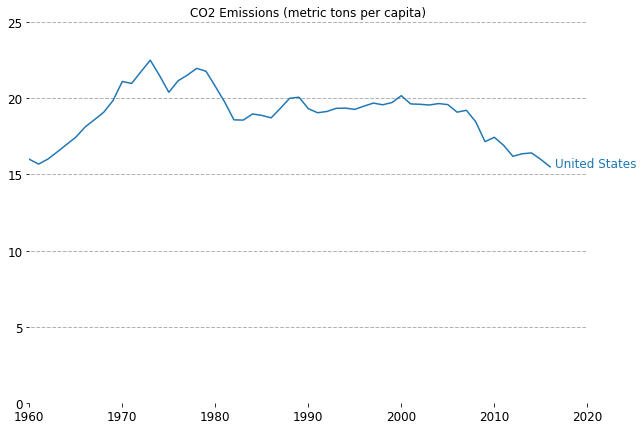

In [49]:
# Plot 1 Data which is USA 
stage1co = data[mask1 & mask2]
countrylist = hist_country.split('|')
plt.figure(figsize=(10,7))
lineplot(stage1co,countrylist,1,1,1960,2020,0,25,0)
plt.show()

In [ ]:
# from the above graph we can conclude that the co2 emission from the multiple metrices we choosed are (
    # CO2 emissions\metric, CO2 emissions\kt, Total greenhouse gas emissions\kt of CO2, 
    # CO2 emissions from gaseous fuel consumption, CO2 emissions from liquid fuel consumption,
    # CO2 emissions from solid fuel consumption )
# Showing some good adjustment as required and are in control and declining through the time axis.
# hence the suggestion for the governament would be likely to continue with the control of the consumption of the 
# CO2 emissions from gaseous fuel consumption, CO2 emissions from liquid fuel consumption,
# CO2 emissions from solid fuel consumption. which are the major cause for the pollution according to the
# world bank stats. and there by if the moves which are taken to control these emissions are the key to have 
# the world at better state than in 1970's which is the peak time of the pollution.
